<a href="https://colab.research.google.com/github/beba0/Projects-/blob/main/supermaket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [18]:
supermarket = pd.read_csv("/content/supermarket.csv")
supermarket.head(3)

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [19]:
supermarket['Tax 5%'] = supermarket['Tax 5%'].round(1)
supermarket['Total'] = supermarket['Total'].round(1)
supermarket['gross margin percentage'] = supermarket['gross margin percentage'].round(1)
supermarket['gross income'] = supermarket['gross income'].round(0)
supermarket = supermarket.drop('Unnamed: 0',axis=1)

In [20]:
supermarket['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [22]:
supermarket.shape

(1000, 17)

In [23]:
supermarket.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [24]:
supermarket.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [25]:
supermarket['City'].str.title().value_counts(dropna=False)
supermarket['Customer type'].str.title().value_counts(dropna=False)
supermarket['Gender'].str.title().value_counts(dropna=False)
supermarket['Product line'].str.title().value_counts(dropna=False)
supermarket['Payment'].str.title().value_counts(dropna=False)

Ewallet        345
Cash           344
Credit Card    311
Name: Payment, dtype: int64

#Branch A 


In [26]:
branch_A = supermarket[supermarket['Branch']=='A']
branch_A.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1,549.0,2019-01-05,13:08,Ewallet,522.83,4.8,26.0,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2,340.5,2019-03-03,13:23,Credit card,324.31,4.8,16.0,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.3,489.0,2019-01-27,20:33,Ewallet,465.76,4.8,23.0,8.4


In [27]:
#the gross income of every product line per month
branch_A['Date'] = pd.to_datetime(branch_A['Date'], errors='coerce')
a = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
a['total income '] = a.iloc[0:].sum(axis=1) 
a.loc['total',0:]= a.sum(axis=0)
a
#wanna get the rush hours (the most time having customers)???????

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total income
Product line,,,,
Electronic accessories,298.0,255.0,320.0,873.0
Fashion accessories,307.0,269.0,204.0,780.0
Food and beverages,221.0,312.0,284.0,817.0
Health and beauty,189.0,133.0,281.0,603.0
Home and lifestyle,493.0,227.0,346.0,1066.0
Sports and travel,308.0,225.0,385.0,918.0
total,1816.0,1421.0,1820.0,5057.0


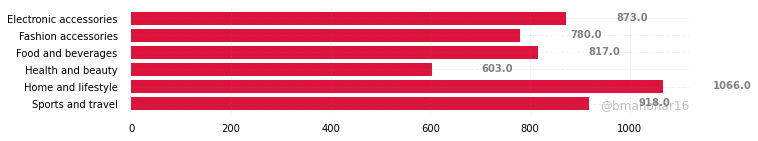

In [28]:
#total profit of every product line 
product_income = branch_A.groupby(['Product line'])['gross income'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(product_income.iloc[:,0], product_income.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('', dpi=100,
            bbox_inches='tight')
plt.show()

In [29]:
#most and less used product

branch_A['Date'] = pd.to_datetime(branch_A['Date'], errors='coerce')
quntity = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Quantity']
             .sum().round(0)
             .unstack(fill_value=0))
quntity['total quantity '] = quntity.iloc[0:].sum(axis=1) 
quntity.loc['total per month',0:]= quntity.sum(axis=0)
quntity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total quantity
Product line,,,,
Electronic accessories,112.0,94.0,116.0,322.0
Fashion accessories,106.0,87.0,70.0,263.0
Food and beverages,90.0,121.0,102.0,313.0
Health and beauty,70.0,52.0,135.0,257.0
Home and lifestyle,175.0,68.0,128.0,371.0
Sports and travel,119.0,75.0,139.0,333.0
total per month,672.0,497.0,690.0,1859.0


In [ ]:
#most used product line
slices = branch_A.groupby(['Product line'])['Quantity'].sum()
labels = 'Electronic accessories','Fashon accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'
explode = (0, 0, 0, 0, 0.1, 0)
plt.pie(slices, labels=labels, explode=explode,autopct='%1.1f%%')

In [ ]:
#most product line used by males and females
per_gender = pd.pivot_table(branch_A, values='Quantity', index=['Product line'],
                    columns=['Gender'], aggfunc='count')
per_gender.sns.histplot(width =0.6, edgecolor = 'black')
sns.barplot(x=df.index, y="Amount", data=per_gender)

In [ ]:
#perc. of who visit more 
slice = branch_A['Gender'].value_counts()
labels = 'Female','Male'
plt.pie(slice, labels=labels, autopct='%1.1f%%')

In [ ]:
#the visitors in every month
visitors =  (branch_A.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Gender'].count()
            .unstack(fill_value=0))
visitors.plot(kind='bar',width=0.4)

#Branch B

In [ ]:
#Branch 'B'
branch_B = supermarket[supermarket['Branch']=='B']
branch_B.head()

In [ ]:
#the gross income of every product line per month

branch_B['Date'] = pd.to_datetime(branch_B['Date'], errors='coerce')
b = (branch_B.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
b['total income '] = b.iloc[0:].sum(axis=1) 
b.loc['total per month',0:]= b.sum(axis=0)
b

In [ ]:
#total profit of every product line 
product_income_b = branch_B.groupby(['Product line'])['gross income'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(product_income_b.iloc[:,0], product_income_b.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

plt.show()

In [ ]:
#most and less used product
branch_B['Date'] = pd.to_datetime(branch_B['Date'], errors='coerce')
quntityb = (branch_B.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Quantity']
             .sum().round(0)
             .unstack(fill_value=0))
quntityb['total quantity '] = quntityb.iloc[0:].sum(axis=1) 
quntityb.loc['total per month',0:]= quntityb.sum(axis=0)
quntityb

In [ ]:
#most product line used by males and females
per_gender_b = pd.pivot_table(branch_B, values='Quantity', index=['Product line'],
                    columns=['Gender'], aggfunc='count')
per_gender_b.plot.bar(width =0.6, edgecolor = 'black')

In [ ]:
#most used product line
slices = branch_B.groupby(['Product line'])['Quantity'].sum()
labels = 'Electronic accessories','Fashon accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'
explode = (0, 0, 0, 0.1, 0, 0.1)
plt.pie(slices, labels=labels, explode=explode,autopct='%1.1f%%')

In [ ]:
#perc. of who visit more 
slice = branch_B['Gender'].value_counts()
labels = 'Female','Male'
plt.pie(slice, labels=labels, autopct='%1.1f%%')

In [ ]:
#the visitors in every month
visitorsb =  (branch_B.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Gender'].count()
            .unstack(fill_value=0))
visitorsb.plot(kind='bar',width=0.3)

#Branch C

In [ ]:
#Branch 'C'
branch_C = supermarket[supermarket['Branch']=='C']
branch_C.head()

In [ ]:
branch_C['Date'] = pd.to_datetime(branch_C['Date'], errors='coerce')
c = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
c['total income '] = c.iloc[0:].sum(axis=1) 
c.loc['total per month',0:]= c.sum(axis=0)
c

In [ ]:
#total profit of every product line 
product_income_c = branch_C.groupby(['Product line'])['gross income'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(product_income_c.iloc[:,0], product_income_c.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5) 

plt.show()

In [ ]:
#most and less used product
branch_C['Date'] = pd.to_datetime(branch_C['Date'], errors='coerce')
quntity_c = (branch_B.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Quantity']
             .sum().round(0)
             .unstack(fill_value=0))
quntity_c['total quantity '] = quntity_c.iloc[0:].sum(axis=1) 
quntity_c.loc['total per month',0:] = quntity_c.sum(axis=0)
quntity_c

In [ ]:
#most product line used by males and females
per_gender_c = pd.pivot_table(branch_C, values='Quantity', index=['Product line'],
                    columns=['Gender'], aggfunc='count')
per_gender_c.plot.bar(width =0.6, edgecolor = 'black')

In [ ]:
#most used product line
slices = branch_C.groupby(['Product line'])['Quantity'].sum()
labels = 'Electronic accessories','Fashon accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'
explode = (0, 0, 0, 0.1, 0, 0.1)
plt.pie(slices, labels=labels, explode=explode,autopct='%1.1f%%')

In [ ]:
#perc. of who visit more 
slice = branch_C['Gender'].value_counts()
labels = 'Female','Male'
plt.pie(slice, labels=labels, autopct='%1.1f%%')

In [ ]:
#the visitors in every month
# what's the error???
branch_C['Date'] = pd.to_datetime(branch_C['Date'], errors='coerce')
visitorsc =  (branch_C.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Gender'].count()
            .unstack(fill_value=0))
visitorsc.plot(kind='bar',width=0.3)

#Comparing between the 3 branches

In [ ]:
#comparing between the quantity of the products line of each branch
quantity = pd.pivot_table(supermarket, values='Quantity', index=['Product line'],
                           columns=['Branch'], aggfunc='sum')
quantity.plot(kind='bar')

In [ ]:
#wanna show the value of the each one??

brancha = branch_A['gross income'].sum()
branchb = branch_B['gross income'].sum()
branchc = branch_C['gross income'].sum()

slices1 = brancha, branchb, branchc
labels1 = 'A', 'B','C'
explode = (0,0,0.1 )
plt.pie(slices1, labels=labels1, autopct='%1.1f%%', explode=explode)

In [ ]:
#customers vists per month
supermarket['Date'] = pd.to_datetime(supermarket['Date'], errors='coerce')
gender = (supermarket.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='right')])
             ['Gender'].count()
            .unstack(fill_value=0))
gender.plot(kind='bar',width=0.3, edgecolor = 'black')

In [54]:
#supermarket.to_csv('supermarket.csv',encoding = 'utf-8-sig')
#files.download('supermarket.csv')